In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [6]:
import pandas as pd

df = pd.read_csv('MSFT.csv')
#df['Date'] = df['Date'].str.extract('(.*) ')
df[["Date1","Date2"]] = df["Date"].str.split(" ", expand=True)
df["Date"] = df["Date1"].str.strip("-")
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.060524
1,1986-03-14,0.062686
2,1986-03-17,0.063767
3,1986-03-18,0.062145
4,1986-03-19,0.061065
...,...,...
9380,2023-06-01,332.579987
9381,2023-06-02,335.399994
9382,2023-06-05,335.940002
9383,2023-06-06,333.679993


In [7]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9380    2023-06-01
9381    2023-06-02
9382    2023-06-05
9383    2023-06-06
9384    2023-06-07
Name: Date, Length: 9385, dtype: object

In [8]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,1986-03-13 00:00:00-05:00,0.060524
1,1986-03-14 00:00:00-05:00,0.062686
2,1986-03-17 00:00:00-05:00,0.063767
3,1986-03-18 00:00:00-05:00,0.062145
4,1986-03-19 00:00:00-05:00,0.061065
...,...,...
9378,2023-05-30 00:00:00-04:00,331.209991
9379,2023-05-31 00:00:00-04:00,328.390015
9380,2023-06-01 00:00:00-04:00,332.579987
9381,2023-06-02 00:00:00-04:00,335.399994


In [9]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9380   2023-06-01
9381   2023-06-02
9382   2023-06-05
9383   2023-06-06
9384   2023-06-07
Name: Date, Length: 9385, dtype: datetime64[ns]

In [10]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.060524
1986-03-14,0.062686
1986-03-17,0.063767
1986-03-18,0.062145
1986-03-19,0.061065
...,...
2023-06-01,332.579987
2023-06-02,335.399994
2023-06-05,335.940002


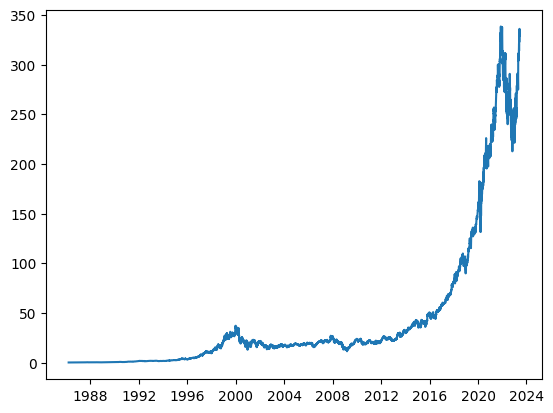

In [11]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [12]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,231.303528,232.861938,230.784042,227.726013
1,2021-03-26,232.861938,230.784042,227.726013,231.783783
2,2021-03-29,230.784042,227.726013,231.783783,230.568420
3,2021-03-30,227.726013,231.783783,230.568420,227.245758
4,2021-03-31,231.783783,230.568420,227.245758,231.087891
...,...,...,...,...,...
247,2022-03-17,273.157257,283.740082,290.894073,291.714233
248,2022-03-18,283.740082,290.894073,291.714233,296.862366
249,2022-03-21,290.894073,291.714233,296.862366,295.607422
250,2022-03-22,291.714233,296.862366,295.607422,300.449219


In [13]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

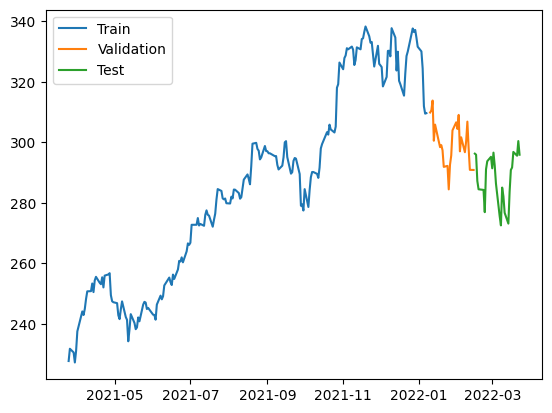

In [14]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 59ms/step - loss: 82320.5859 - mean_absolute_error: 285.1508 - val_loss: 90232.7969 - val_mean_absolute_error: 300.3020
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 82099.4766 - mean_absolute_error: 284.7641 - val_loss: 90054.9062 - val_mean_absolute_error: 300.0056
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 81963.1016 - mean_absolute_error: 284.5255 - val_loss: 89949.3281 - val_mean_absolute_error: 299.8297
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 81879.6562 - mean_absolute_error: 284.3779 - val_loss: 89877.5469 - val_mean_absolute_error: 299.7099
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 81806.7891 - mean_absolute_error: 284.2507 - val_loss: 89786.2266 - val_mean_absolute_error: 299.5576
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 81706.6484 - mean_absolute_error: 284.0744 - val_loss: 89650.72

7/7 [==============================] - 0s 5ms/step - loss: 24.8139 - mean_absolute_error: 3.8506 - val_loss: 37.9711 - val_mean_absolute_error: 5.0196
Epoch 98/100
7/7 [==============================] - 0s 5ms/step - loss: 27.3523 - mean_absolute_error: 4.1705 - val_loss: 32.4256 - val_mean_absolute_error: 4.6760
Epoch 99/100
7/7 [==============================] - 0s 5ms/step - loss: 25.0688 - mean_absolute_error: 3.8434 - val_loss: 32.8785 - val_mean_absolute_error: 4.6855
Epoch 100/100
7/7 [==============================] - 0s 5ms/step - loss: 25.2952 - mean_absolute_error: 4.0181 - val_loss: 33.0865 - val_mean_absolute_error: 4.7042


7/7 [==============================] - 0s 1ms/step


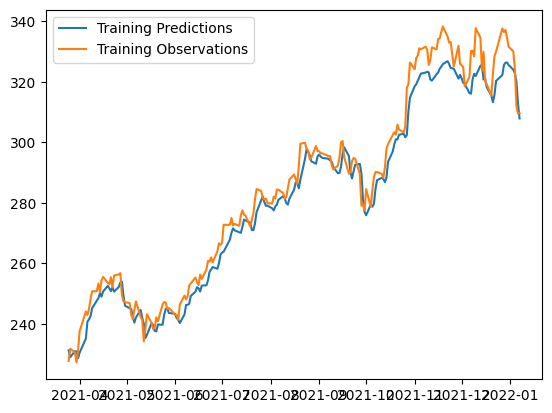

In [16]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 15ms/step


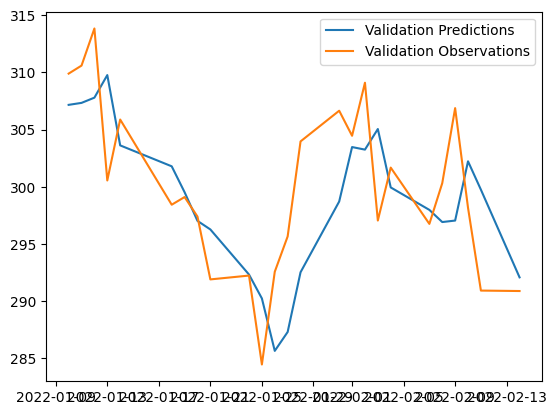

In [17]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 15ms/step


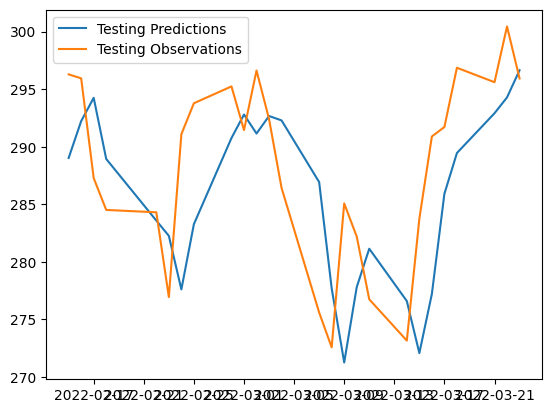

In [18]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

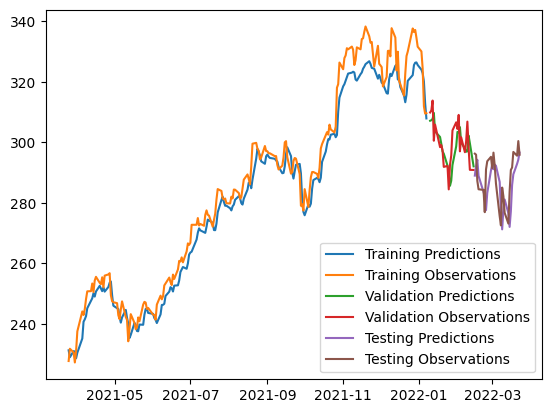

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [20]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 16ms/step


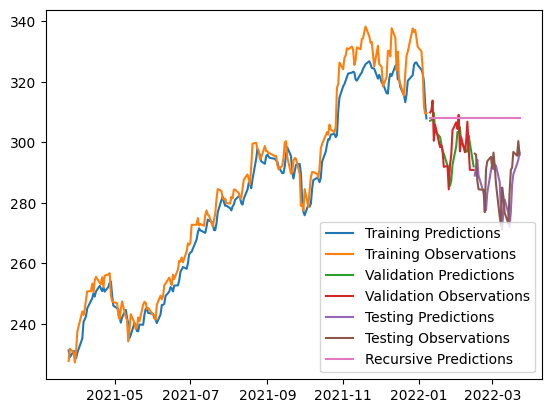

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])